In [7]:
#!pip install tensorflow-gpu

In [8]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
tf.__version__

'2.5.0'

In [10]:
import struct, os 

In [11]:
def load_mnist(path, kind="train"):
    labels_path = os.path.join(path, "%s-labels-idx1-ubyte"%kind)
    images_path = os.path.join(path, "%s-images-idx3-ubyte"%kind)
    #label
    with open(labels_path,"rb")as la_path:
        magic,n = struct.unpack(">II",la_path.read(8))
        labels = np.fromfile(la_path, dtype=np.uint8)
    #image
    with open(images_path,"rb") as img_path:
        magic, num, rows, cols = struct.unpack(">IIII",img_path.read(16))
        images = np.fromfile(img_path, dtype=np.uint8).reshape(len(labels), 28**2)
        images = ((images/255) - 0.5)*2
    return images, labels


In [12]:
X_train, y_train = load_mnist("./", kind="train")
X_test, y_test = load_mnist("./", kind="t10k")
print(X_train.shape[0], X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])

60000 784
10000 784


In [13]:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)
X_train_centered = (X_train-mean_vals)/std_val
X_test_centered = (X_test-mean_vals)/std_val

In [14]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_train_onehot[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [16]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(
        units = 50,          ## 파생되는 신경망1의 개수 50개
        input_dim = X_train_centered.shape[1],
        kernel_initializer = 'glorot_uniform',  ## W(가중치)
        bias_initializer = 'zeros',  ## b
        activation="tanh"  ## 전달함수 , 파이토치에서는 렐루 함수와 동일 / 하이퍼볼릭 탄젠트
    )
)
model.add(
    tf.keras.layers.Dense(
        units = 50,           ## 파생되는 신경망2의 개수 50개 작게 잡으면 처리속도가 빠르게 계산되지만 값이 희미해질 수 있고, 많아도 비슷함, 최적화된 수를 찾아주는것이 제일 좋은 방법
        input_dim = 50,
        kernel_initializer = 'glorot_uniform',  ## W(가중치)
        bias_initializer = 'zeros',  ## b
        activation="tanh"
)
)
model.add(
    tf.keras.layers.Dense(
        units = 10,       ## 파생되어 산출되는 마지막 신경망3의 개수 10개
        input_dim = 50,
        kernel_initializer = 'glorot_uniform',  ## W(가중치)
        bias_initializer = 'zeros',  ## b
        activation="softmax"  ## 다 합치면 1 하나의 확률변수
)
)


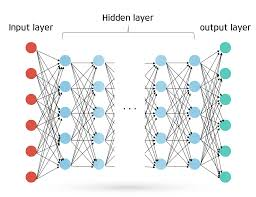

Dense가 히든 레이어 수, Shape이 펼쳐진 가지 수,  

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [18]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.0001,decay=1e-7,momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss = "categorical_crossentropy")

C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [19]:
model.fit(X_train_centered,y_train_onehot, batch_size=64,epochs=50,
         verbose=1,validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 1s 1ms/step - loss: 1.6313 - val_loss: 1.1242
Epoch 2/50
844/844 [==============================] - 1s 1ms/step - loss: 1.0060 - val_loss: 0.8101
Epoch 3/50
844/844 [==============================] - 1s 1ms/step - loss: 0.7957 - val_loss: 0.6592
Epoch 4/50
844/844 [==============================] - 1s 1ms/step - loss: 0.6796 - val_loss: 0.5678
Epoch 5/50
844/844 [==============================] - 1s 1ms/step - loss: 0.6039 - val_loss: 0.5061
Epoch 6/50
844/844 [==============================] - 1s 1ms/step - loss: 0.5503 - val_loss: 0.4618
Epoch 7/50
844/844 [==============================] - 1s 1ms/step - loss: 0.5103 - val_loss: 0.4285
Epoch 8/50
844/844 [==============================] - 1s 1ms/step - loss: 0.4792 - val_loss: 0.4024
Epoch 9/50
844/844 [==============================] - 1s 1ms/step - loss: 0.4541 - val_loss: 0.3813
Epoch 10/50
844/844 [==============================] - 1s 1ms/step - loss: 0.4335 - val_loss: 0.3641

In [20]:
y_train_pred = model.predict_classes(X_train_centered,verbose=0)
y_train_pred[:3]

C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 0, 4], dtype=int64)

In [21]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [22]:
# 예측한 것이 몇개나 맞췄을까?
total_predicts = np.sum(y_train==y_train_pred,axis=0)
print(total_predicts)
train_res = total_predicts/y_train.shape[0]
print(train_res)

56276
0.9379333333333333


In [23]:
y_test_pred = model.predict_classes(X_test_centered,verbose=0)
y_test_pred[:3]

array([7, 2, 1], dtype=int64)

In [24]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [25]:
# 예측한 것이 몇개나 맞췄을까?
total_predicts = np.sum(y_test==y_test_pred,axis=0)
print(total_predicts)
test_res = total_predicts/y_test.shape[0]
print(test_res)

9337
0.9337


In [26]:
#틀린것은 왜 틀렸나?
n=0
for i, y in enumerate(y_test):
    if y != y_test_pred[i]:
        print(i,y,y_test_pred[i],"다름")
        n+=1
print(n)

8 5 6 다름
38 2 3 다름
63 3 2 다름
66 6 7 다름
73 9 7 다름
77 2 7 다름
124 7 4 다름
126 0 2 다름
149 2 4 다름
193 9 4 다름
195 3 5 다름
217 6 5 다름
233 8 7 다름
241 9 8 다름
247 4 2 다름
259 6 0 다름
290 8 4 다름
300 4 6 다름
313 3 5 다름
320 9 7 다름
321 2 7 다름
325 4 9 다름
340 5 3 다름
341 6 4 다름
352 5 0 다름
358 7 9 다름
362 2 3 다름
380 0 5 다름
381 3 7 다름
435 8 7 다름
444 2 8 다름
445 6 0 다름
448 9 8 다름
449 3 5 다름
478 5 8 다름
479 9 3 다름
495 8 2 다름
502 5 3 다름
507 3 5 다름
528 3 2 다름
542 8 2 다름
543 8 3 다름
551 7 1 다름
565 4 9 다름
578 3 8 다름
582 8 2 다름
591 8 3 다름
613 2 8 다름
619 1 8 다름
628 3 9 다름
629 2 6 다름
659 2 8 다름
684 7 3 다름
689 7 9 다름
691 8 4 다름
692 5 7 다름
707 4 9 다름
717 0 6 다름
720 5 8 다름
740 4 9 다름
741 2 8 다름
760 4 9 다름
791 5 9 다름
839 8 3 다름
844 8 7 다름
874 9 4 다름
881 4 9 다름
882 9 7 다름
924 2 7 다름
938 3 5 다름
939 2 0 다름
947 8 9 다름
950 7 2 다름
956 1 6 다름
959 4 9 다름
960 7 1 다름
965 6 0 다름
982 3 2 다름
1003 5 3 다름
1014 6 5 다름
1032 5 8 다름
1039 7 9 다름
1044 6 8 다름
1050 2 6 다름
1052 8 9 다름
1062 3 7 다름
1068 8 4 다름
1082 5 3 다름
1107 9 3 다름
1112 4 6 다름
1114 

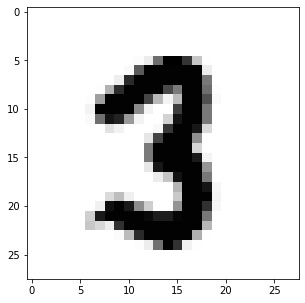

In [27]:
# 9986번째의 그림은 y값으로 3이 확실한데 모델이 판단하기를 8로 판단했다.
plt.figure(figsize=(5,5))
image = np.reshape(X_test[9986],[28,28])
plt.imshow(image,cmap="Greys")
plt.show()

# CNN(Convolutional Neural Network)

In [28]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),padding='valid', activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5),padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5)) ## 오버피팅을 방지함
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)             

In [34]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])